## Método de Gumbel: modela eventos extremos.

Resultados para Pontuação (PTS) com X = 100:
Probabilidade de marcar acima de X: 0.66
Probabilidade de atingir ou exceder X: 0.66
Probabilidade de atingir ou ficar abaixo de X: 0.34
Proporção de valores menores ou iguais a X: 0.34
Valores menores que X: 42.00
Proporção de valores menores que X: 0.31

Resultados para Assistências (AST) com X = 25:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 135.00
Proporção de valores menores que X: 1.00

Resultados para Rebotes (REB) com X = 50:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 135.00
Proporção de valores menores que X: 1.00


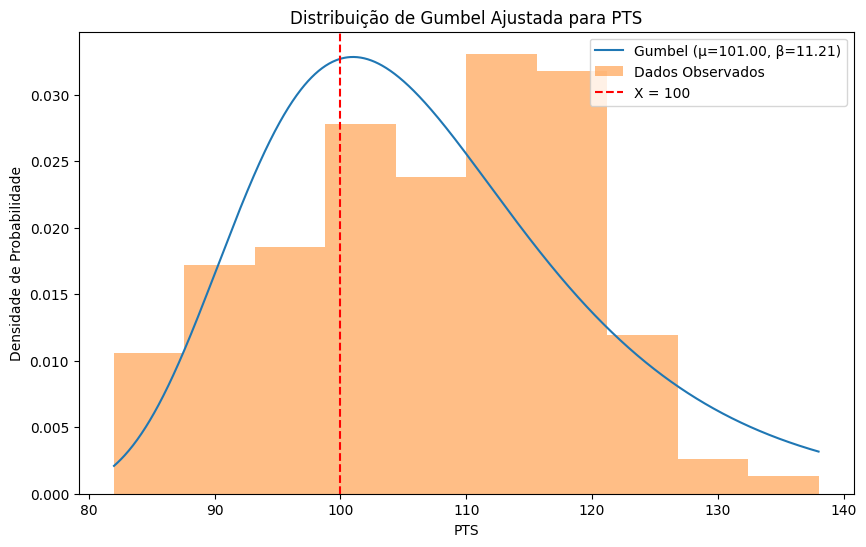

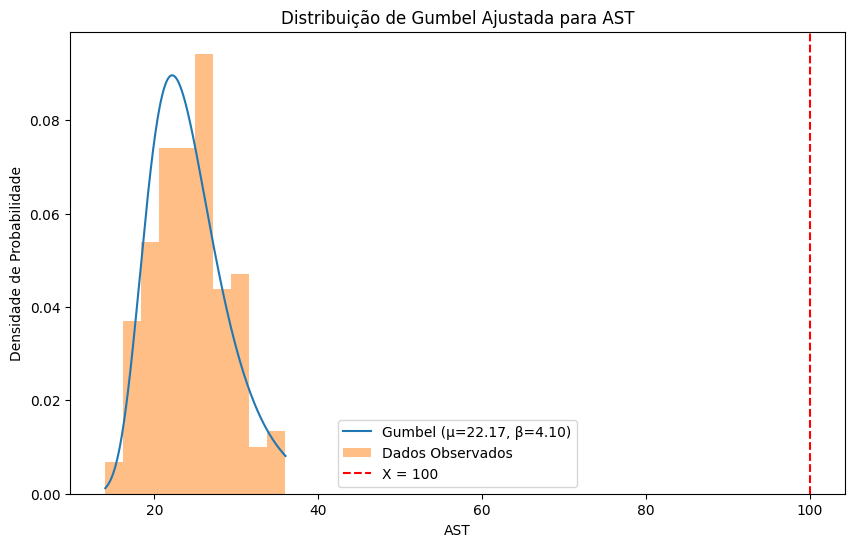

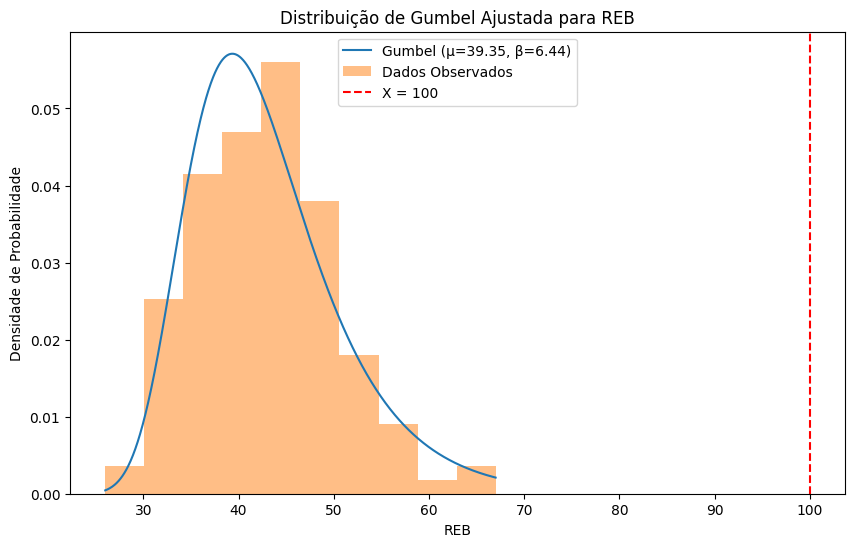

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# 1. Carregar os dados
df = pd.read_csv('charlotte_hornets_games_transformed.csv')

# 2. Selecionar as colunas de interesse
columns_of_interest = ['PTS', 'AST', 'REB']
data = df[columns_of_interest]

# Função para aplicar o Método de Gumbel e responder às perguntas guia
def aplicar_gumbel(dados, coluna, X):
    # Ajustar a distribuição de Gumbel para máximos
    params = gumbel_r.fit(dados[coluna])
    mu, beta = params

    # Funções para calcular probabilidades
    def probabilidade_acima_de_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_atingir_ou_exceder_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_abaixo_de_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def proporcao_menores_ou_iguais_a_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def valores_menores_que_X(X):
        # Retornar o número de valores menores que X
        return np.sum(dados[coluna] < X)

    def proporcao_menores_X(X):
        # Retornar a proporção de valores menores que X
        return np.mean(dados[coluna] < X)

    # Resultados
    resultados = {
        "Probabilidade de marcar acima de X": probabilidade_acima_de_X(X),
        "Probabilidade de atingir ou exceder X": probabilidade_atingir_ou_exceder_X(X),
        "Probabilidade de atingir ou ficar abaixo de X": probabilidade_abaixo_de_X(X),
        "Proporção de valores menores ou iguais a X": proporcao_menores_ou_iguais_a_X(X),
        "Valores menores que X": valores_menores_que_X(X),
        "Proporção de valores menores que X": proporcao_menores_X(X)
    }
    return resultados, mu, beta

# Definir valor de X para as perguntas guia
X = 100  # Exemplo: 100 pontos, 25 assistências, 50 rebotes

# Aplicar o Método de Gumbel para cada estatística
resultados_pts, mu_pts, beta_pts = aplicar_gumbel(data, "PTS", X)
resultados_ast, mu_ast, beta_ast = aplicar_gumbel(data, "AST", X)
resultados_reb, mu_reb, beta_reb = aplicar_gumbel(data, "REB", X)

# Exibir resultados para X = 100
print("Resultados para Pontuação (PTS) com X = 100:")
for pergunta, resposta in resultados_pts.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Assistências (AST) com X = 25:")
for pergunta, resposta in resultados_ast.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Rebotes (REB) com X = 50:")
for pergunta, resposta in resultados_reb.items():
    print(f"{pergunta}: {resposta:.2f}")

def plot_gumbel(dados, coluna, mu, beta, X):
    x = np.linspace(min(dados[coluna]), max(dados[coluna]), 1000)
    y = gumbel_r.pdf(x, loc=mu, scale=beta)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"Gumbel (μ={mu:.2f}, β={beta:.2f})")
    plt.hist(dados[coluna], bins=10, density=True, alpha=0.5, label="Dados Observados")
    plt.axvline(X, color='red', linestyle='--', label=f"X = {X}")
    plt.xlabel(coluna)
    plt.ylabel("Densidade de Probabilidade")
    plt.title(f"Distribuição de Gumbel Ajustada para {coluna}")
    plt.legend()
    plt.show()

# Plotar gráficos para X = 100
plot_gumbel(data, "PTS", mu_pts, beta_pts, X)
plot_gumbel(data, "AST", mu_ast, beta_ast, X)
plot_gumbel(data, "REB", mu_reb, beta_reb, X)

Resultados para Pontuação (PTS) com X = 100:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 135.00
Proporção de valores menores que X: 1.00

Resultados para Assistências (AST) com X = 25:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 135.00
Proporção de valores menores que X: 1.00

Resultados para Rebotes (REB) com X = 50:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 135.00
Proporção de valores menores que X: 1.00


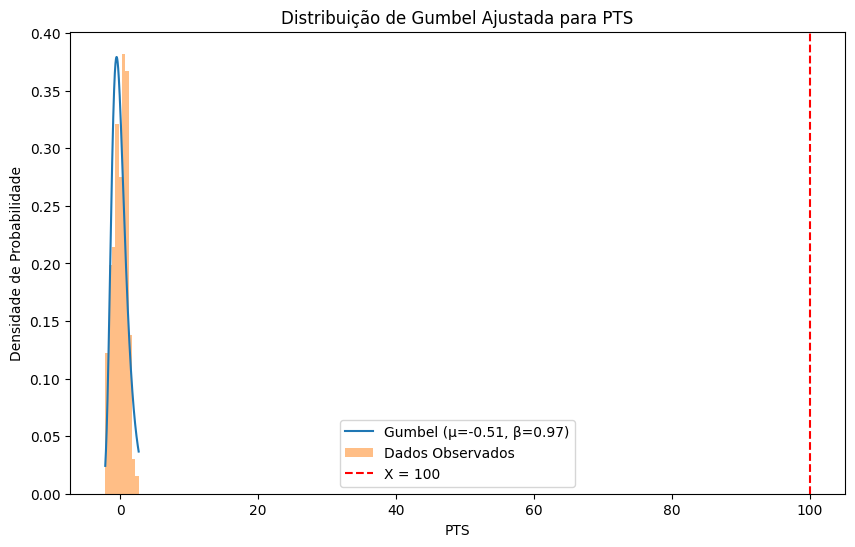

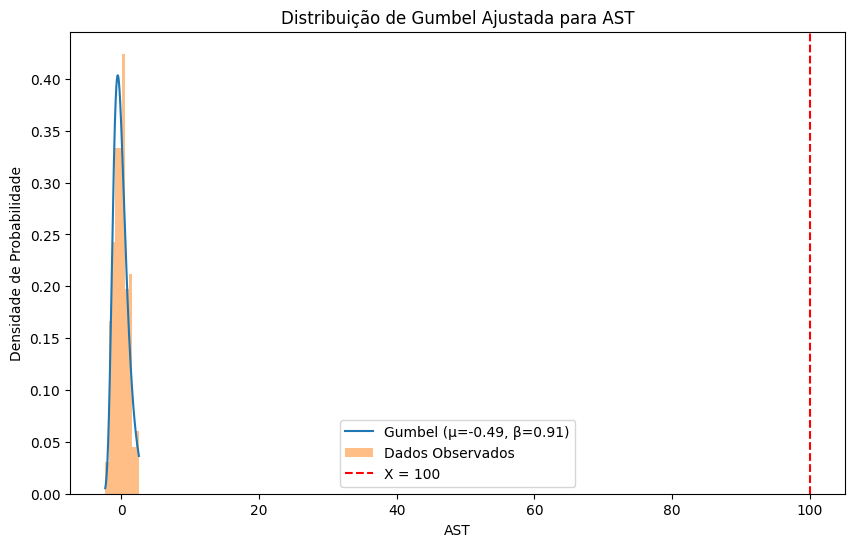

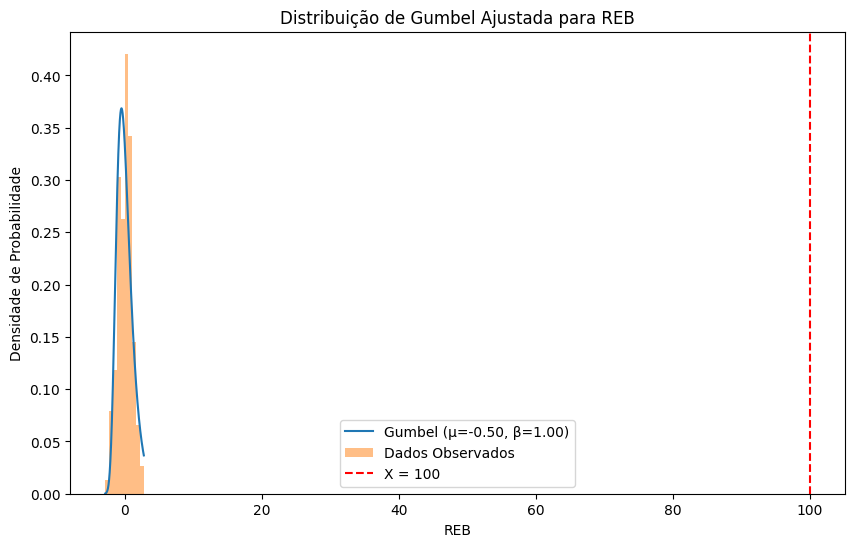

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# 1. Carregar os dados
df = pd.read_csv('charlotte_hornets_games_transformed_scaled.csv')

# 2. Selecionar as colunas de interesse
columns_of_interest = ['PTS', 'AST', 'REB']
data = df[columns_of_interest]

# Função para aplicar o Método de Gumbel e responder às perguntas guia
def aplicar_gumbel(dados, coluna, X):
    # Ajustar a distribuição de Gumbel para máximos
    params = gumbel_r.fit(dados[coluna])
    mu, beta = params

    # Funções para calcular probabilidades
    def probabilidade_acima_de_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_atingir_ou_exceder_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_abaixo_de_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def proporcao_menores_ou_iguais_a_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def valores_menores_que_X(X):
        # Retornar o número de valores menores que X
        return np.sum(dados[coluna] < X)

    def proporcao_menores_X(X):
        # Retornar a proporção de valores menores que X
        return np.mean(dados[coluna] < X)

    # Resultados
    resultados = {
        "Probabilidade de marcar acima de X": probabilidade_acima_de_X(X),
        "Probabilidade de atingir ou exceder X": probabilidade_atingir_ou_exceder_X(X),
        "Probabilidade de atingir ou ficar abaixo de X": probabilidade_abaixo_de_X(X),
        "Proporção de valores menores ou iguais a X": proporcao_menores_ou_iguais_a_X(X),
        "Valores menores que X": valores_menores_que_X(X),
        "Proporção de valores menores que X": proporcao_menores_X(X)
    }
    return resultados, mu, beta

# Definir valor de X para as perguntas guia
X = 100  # Exemplo: 100 pontos, 25 assistências, 50 rebotes

# Aplicar o Método de Gumbel para cada estatística
resultados_pts, mu_pts, beta_pts = aplicar_gumbel(data, "PTS", X)
resultados_ast, mu_ast, beta_ast = aplicar_gumbel(data, "AST", X)
resultados_reb, mu_reb, beta_reb = aplicar_gumbel(data, "REB", X)

# Exibir resultados para X = 100
print("Resultados para Pontuação (PTS) com X = 100:")
for pergunta, resposta in resultados_pts.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Assistências (AST) com X = 25:")
for pergunta, resposta in resultados_ast.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Rebotes (REB) com X = 50:")
for pergunta, resposta in resultados_reb.items():
    print(f"{pergunta}: {resposta:.2f}")

def plot_gumbel(dados, coluna, mu, beta, X):
    x = np.linspace(min(dados[coluna]), max(dados[coluna]), 1000)
    y = gumbel_r.pdf(x, loc=mu, scale=beta)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"Gumbel (μ={mu:.2f}, β={beta:.2f})")
    plt.hist(dados[coluna], bins=10, density=True, alpha=0.5, label="Dados Observados")
    plt.axvline(X, color='red', linestyle='--', label=f"X = {X}")
    plt.xlabel(coluna)
    plt.ylabel("Densidade de Probabilidade")
    plt.title(f"Distribuição de Gumbel Ajustada para {coluna}")
    plt.legend()
    plt.show()

# Plotar gráficos para X = 100
plot_gumbel(data, "PTS", mu_pts, beta_pts, X)
plot_gumbel(data, "AST", mu_ast, beta_ast, X)
plot_gumbel(data, "REB", mu_reb, beta_reb, X)

Resultados para Pontuação (PTS) com X = 100:
Probabilidade de marcar acima de X: 0.62
Probabilidade de atingir ou exceder X: 0.62
Probabilidade de atingir ou ficar abaixo de X: 0.38
Proporção de valores menores ou iguais a X: 0.38
Valores menores que X: 41.00
Proporção de valores menores que X: 0.31

Resultados para Assistências (AST) com X = 25:
Probabilidade de marcar acima de X: 0.42
Probabilidade de atingir ou exceder X: 0.42
Probabilidade de atingir ou ficar abaixo de X: 0.58
Proporção de valores menores ou iguais a X: 0.58
Valores menores que X: 70.00
Proporção de valores menores que X: 0.53

Resultados para Rebotes (REB) com X = 50:
Probabilidade de marcar acima de X: 0.22
Probabilidade de atingir ou exceder X: 0.22
Probabilidade de atingir ou ficar abaixo de X: 0.78
Proporção de valores menores ou iguais a X: 0.78
Valores menores que X: 114.00
Proporção de valores menores que X: 0.86


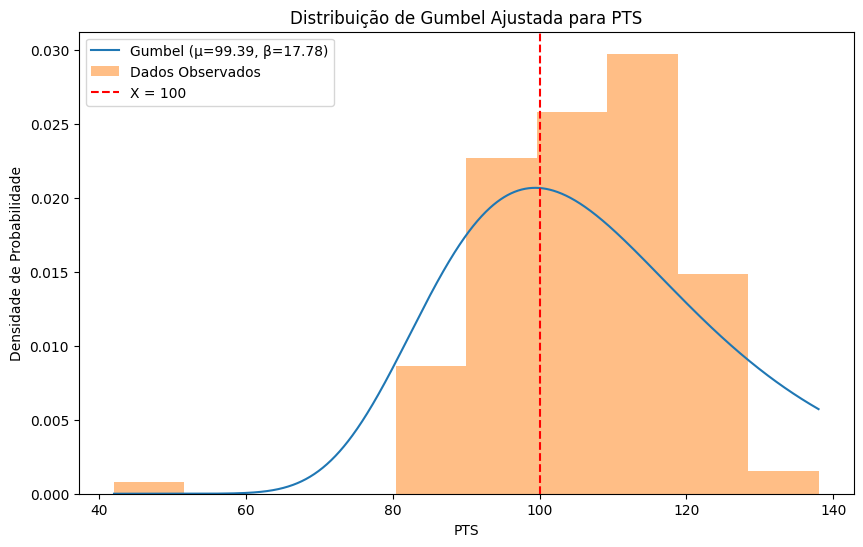

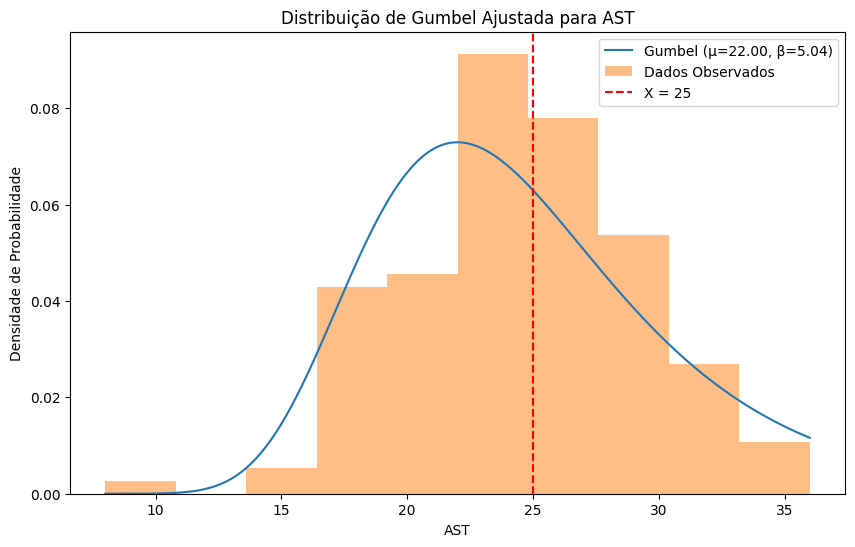

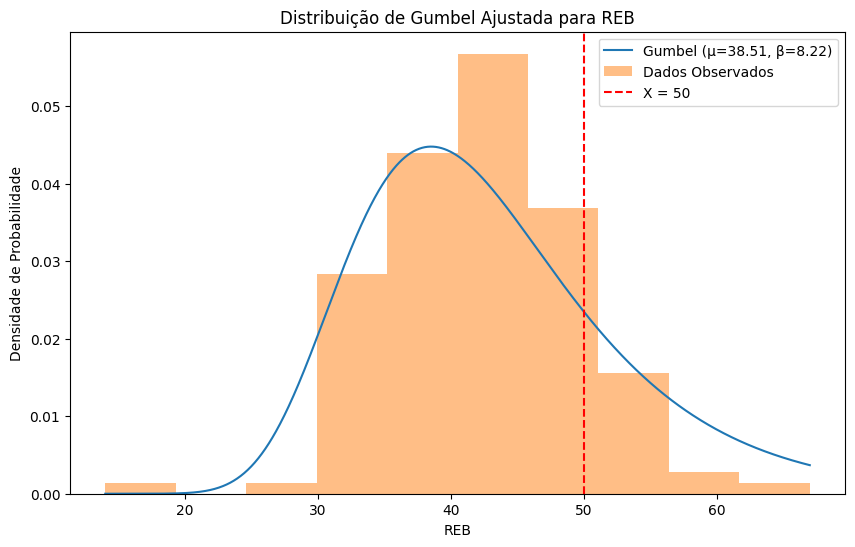

In [3]:
from nba_api.stats.endpoints import teamgamelog
from nba_api.stats.static import teams
import pandas as pd
import numpy as np
from scipy.stats import gumbel_r
import matplotlib.pyplot as plt

# Encontrar o ID do Charlotte Hornets
hornets = teams.find_team_by_abbreviation('CHA')
hornets_id = hornets['id']

# Extrair os dados dos jogos para as temporadas 23-24 e 24-25
game_logs_23_24 = teamgamelog.TeamGameLog(team_id=hornets_id, season='2023-24').get_data_frames()[0]
game_logs_24_25 = teamgamelog.TeamGameLog(team_id=hornets_id, season='2024-25').get_data_frames()[0]

# Combinar os dados das duas temporadas
all_game_logs = pd.concat([game_logs_23_24, game_logs_24_25])

# Função para aplicar o Método de Gumbel e responder às perguntas guia
def aplicar_gumbel(dados, coluna, X):
    # Ajustar a distribuição de Gumbel para máximos
    params = gumbel_r.fit(dados[coluna])
    mu, beta = params

    # Funções para calcular probabilidades
    def probabilidade_acima_de_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_atingir_ou_exceder_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_abaixo_de_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def proporcao_menores_ou_iguais_a_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def valores_menores_que_X(X):
        # Retornar o número de valores menores que X
        return np.sum(dados[coluna] < X)

    def proporcao_menores_X(X):
        # Retornar a proporção de valores menores que X
        return np.mean(dados[coluna] < X)

    # Resultados
    resultados = {
        "Probabilidade de marcar acima de X": probabilidade_acima_de_X(X),
        "Probabilidade de atingir ou exceder X": probabilidade_atingir_ou_exceder_X(X),
        "Probabilidade de atingir ou ficar abaixo de X": probabilidade_abaixo_de_X(X),
        "Proporção de valores menores ou iguais a X": proporcao_menores_ou_iguais_a_X(X),
        "Valores menores que X": valores_menores_que_X(X),
        "Proporção de valores menores que X": proporcao_menores_X(X)
    }
    return resultados, mu, beta

# Definir valores de X para cada estatística
X_pts = 100  # Pontos
X_ast = 25   # Assistências
X_reb = 50   # Rebotes

# Aplicar o Método de Gumbel para cada estatística
resultados_pts, mu_pts, beta_pts = aplicar_gumbel(all_game_logs, "PTS", X_pts)
resultados_ast, mu_ast, beta_ast = aplicar_gumbel(all_game_logs, "AST", X_ast)
resultados_reb, mu_reb, beta_reb = aplicar_gumbel(all_game_logs, "REB", X_reb)

# Exibir resultados para Pontos (PTS)
print("Resultados para Pontuação (PTS) com X = 100:")
for pergunta, resposta in resultados_pts.items():
    print(f"{pergunta}: {resposta:.2f}")

# Exibir resultados para Assistências (AST)
print("\nResultados para Assistências (AST) com X = 25:")
for pergunta, resposta in resultados_ast.items():
    print(f"{pergunta}: {resposta:.2f}")

# Exibir resultados para Rebotes (REB)
print("\nResultados para Rebotes (REB) com X = 50:")
for pergunta, resposta in resultados_reb.items():
    print(f"{pergunta}: {resposta:.2f}")

# Função para plotar a distribuição de Gumbel
def plot_gumbel(dados, coluna, mu, beta, X):
    x = np.linspace(min(dados[coluna]), max(dados[coluna]), 1000)
    y = gumbel_r.pdf(x, loc=mu, scale=beta)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"Gumbel (μ={mu:.2f}, β={beta:.2f})")
    plt.hist(dados[coluna], bins=10, density=True, alpha=0.5, label="Dados Observados")
    plt.axvline(X, color='red', linestyle='--', label=f"X = {X}")
    plt.xlabel(coluna)
    plt.ylabel("Densidade de Probabilidade")
    plt.title(f"Distribuição de Gumbel Ajustada para {coluna}")
    plt.legend()
    plt.show()

# Plotar gráficos para cada estatística
plot_gumbel(all_game_logs, "PTS", mu_pts, beta_pts, X_pts)
plot_gumbel(all_game_logs, "AST", mu_ast, beta_ast, X_ast)
plot_gumbel(all_game_logs, "REB", mu_reb, beta_reb, X_reb)

## GAMLSS: Generalized Additive Models for Location Scale and Shape

In [4]:
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import playergamelog
from pygam import PoissonGAM, LinearGAM, s
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def get_player_gamelog(player_id, season):
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season)
    return gamelog.get_data_frames()[0]

# IDs dos jogadores
player_ids = {
    'LaMelo Ball': 1630163,
    'Moussa Diabate': 1631217,
    'Brandon Miller': 1631109
}

# Coletar dados para as temporadas 23-24 e 24-25
seasons = ['2023-24', '2024-25']
data = []

for player, pid in player_ids.items():
    for season in seasons:
        gamelog = get_player_gamelog(pid, season)
        gamelog['PLAYER'] = player
        gamelog['SEASON'] = season
        data.append(gamelog)

df = pd.concat(data)

df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
df = df.sort_values(by=['PLAYER', 'GAME_DATE'])
df = df[['PLAYER', 'SEASON', 'GAME_DATE', 'PTS', 'REB', 'AST']]
df = df.dropna()

def fit_gam(df, target, gam_type):
    X = df[['PTS', 'REB', 'AST']]
    y = df[target]
    if gam_type == 'Poisson':
        gam = PoissonGAM(s(0) + s(1) + s(2))
    else:
        gam = LinearGAM(s(0) + s(1) + s(2))
    gam.fit(X, y)
    return gam

# Exemplo para LaMelo Ball
lamelo_df = df[df['PLAYER'] == 'LaMelo Ball']
pts_gam = fit_gam(lamelo_df, 'PTS', 'Poisson')
reb_gam = fit_gam(lamelo_df, 'REB', 'Linear')
ast_gam = fit_gam(lamelo_df, 'AST', 'Linear')

def predict_and_probabilities(gam, X, target):
    predictions = gam.predict(X)
    mean = np.mean(predictions)
    median = np.median(predictions)
    mode = np.argmax(np.bincount(predictions.astype(int)))
    max_val = np.max(predictions)
    min_val = np.min(predictions)
    
    prob_above_mean = np.mean(predictions > mean)
    prob_below_mean = np.mean(predictions < mean)
    prob_above_median = np.mean(predictions > median)
    prob_below_median = np.mean(predictions < median)
    prob_above_mode = np.mean(predictions > mode)
    prob_below_mode = np.mean(predictions < mode)
    prob_above_max = np.mean(predictions > max_val)
    prob_below_min = np.mean(predictions < min_val)
    
    return {
        'predictions': predictions,
        'probabilities': {
            'above_mean': prob_above_mean,
            'below_mean': prob_below_mean,
            'above_median': prob_above_median,
            'below_median': prob_below_median,
            'above_mode': prob_above_mode,
            'below_mode': prob_below_mode,
            'above_max': prob_above_max,
            'below_min': prob_below_min
        }
    }

# Exemplo para LaMelo Ball
X_lamelo = lamelo_df[['PTS', 'REB', 'AST']]
pts_results = predict_and_probabilities(pts_gam, X_lamelo, 'PTS')
reb_results = predict_and_probabilities(reb_gam, X_lamelo, 'REB')
ast_results = predict_and_probabilities(ast_gam, X_lamelo, 'AST')

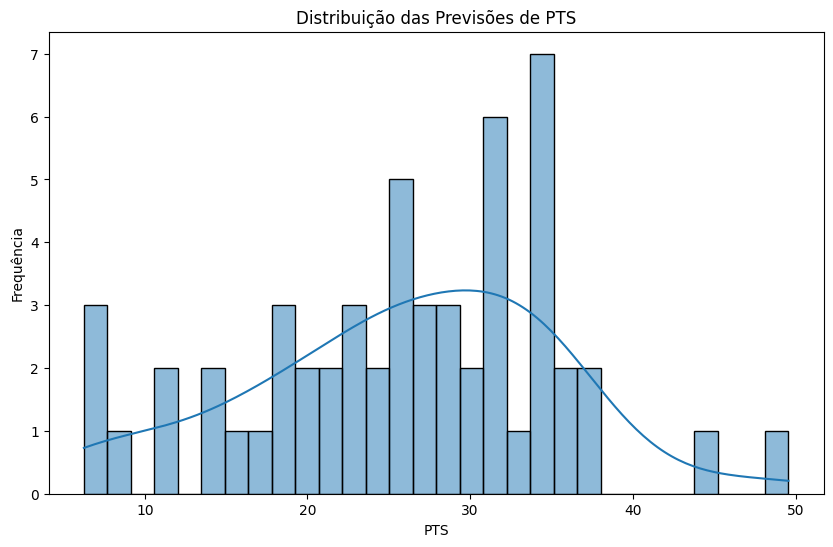

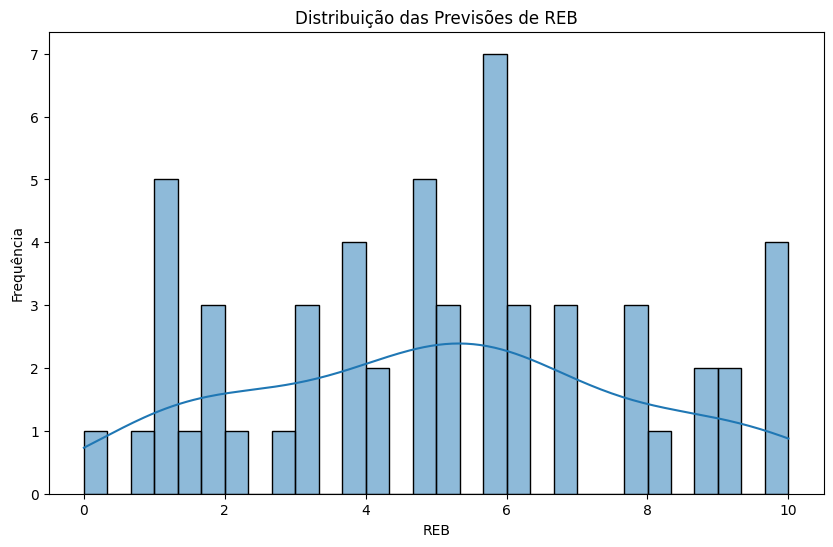

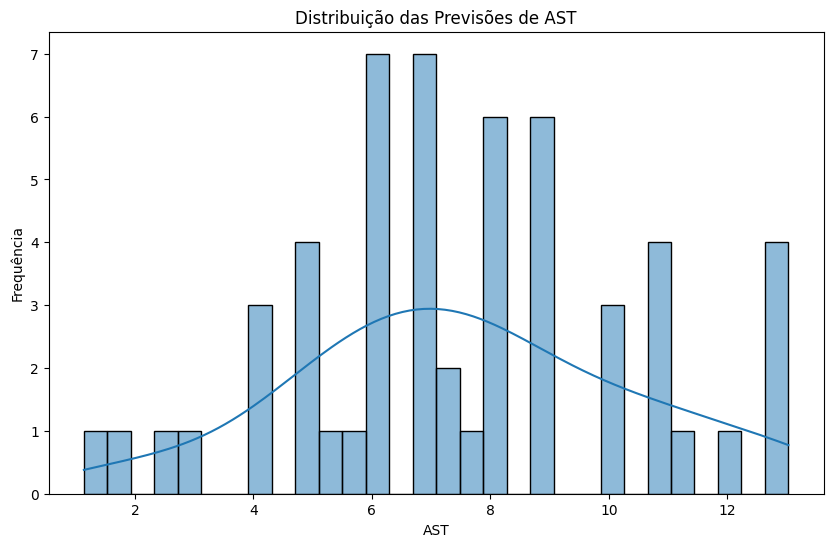

In [5]:
def plot_predictions(predictions, target):
    plt.figure(figsize=(10, 6))
    sns.histplot(predictions, kde=True, bins=30)
    plt.title(f'Distribuição das Previsões de {target}')
    plt.xlabel(target)
    plt.ylabel('Frequência')
    plt.show()

plot_predictions(pts_results['predictions'], 'PTS')
plot_predictions(reb_results['predictions'], 'REB')
plot_predictions(ast_results['predictions'], 'AST')

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Matriz de Confusão')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

# Exemplo de matriz de confusão (ajuste conforme necessário)
# plot_confusion_matrix(y_true, y_pred)

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Exemplo de curva ROC (ajuste conforme necessário)
# plot_roc_curve(y_true, y_pred)

# Regressão Linear

In [6]:
pip install pandas numpy matplotlib seaborn scikit-learn nba_api

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


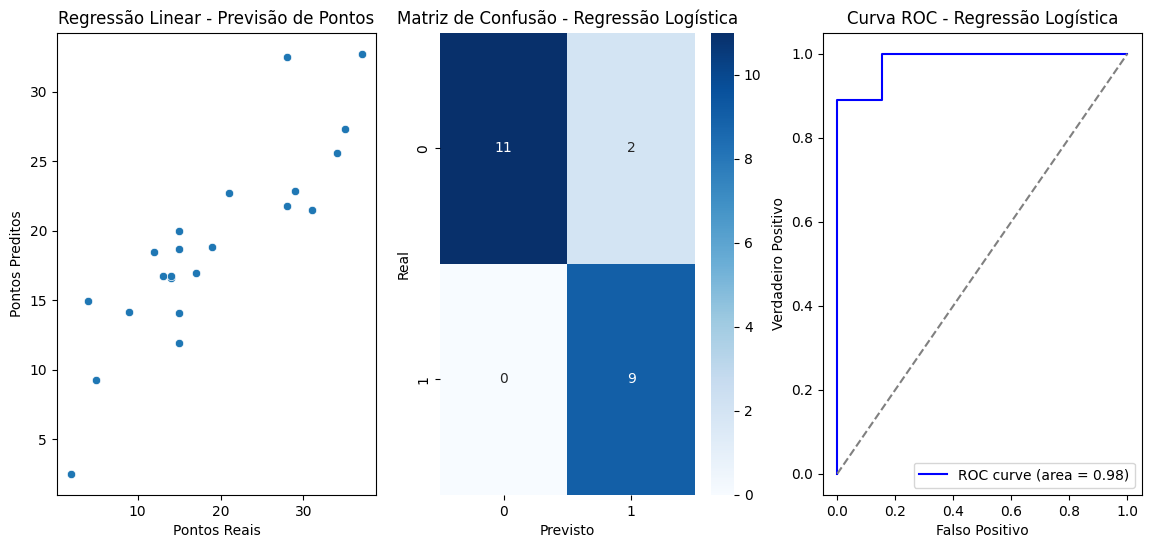

Relatório de Classificação - Regressão Logística:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.82      1.00      0.90         9

    accuracy                           0.91        22
   macro avg       0.91      0.92      0.91        22
weighted avg       0.93      0.91      0.91        22



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.endpoints import PlayerGameLog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# IDs dos jogadores do Charlotte Hornets
players = {
    "LaMelo Ball": 1630163,
    "Moussa Diabate": 1631217,
    "Brandon Miller": 1641706,
}

# Função para obter estatísticas da API
def get_player_stats(player_id):
    log = PlayerGameLog(player_id=player_id, season="2023-24").get_data_frames()[0]
    return log[["MIN", "FGA", "TOV", "PTS", "REB", "AST"]]

# Coletar dados dos jogadores
df = pd.concat([get_player_stats(pid) for pid in players.values()])
df = df.dropna()  # Remover valores nulos

# Converter minutos em float (pode vir como string "30:45")
df["MIN"] = df["MIN"].apply(lambda x: int(x.split(":")[0]) + int(x.split(":")[1]) / 60 if ":" in str(x) else float(x))

# Definir variáveis independentes e dependentes
X = df[["MIN", "FGA", "TOV"]]  # Variáveis independentes
y_lin = df["PTS"]  # Regressão Linear (Prever pontos)
y_log = (df["PTS"] > df["PTS"].median()).astype(int)  # Regressão Logística (acima/abaixo da média)

# Dividir dados de treino e teste
X_train, X_test, y_train_lin, y_test_lin = train_test_split(X, y_lin, test_size=0.2, random_state=42)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 🔹 Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_lin)
y_pred_lin = lin_reg.predict(X_test)

# 🔹 Regressão Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_log)
y_pred_log = log_reg.predict(X_test)

# 🔹 Matriz de Confusão para Regressão Logística
conf_matrix = confusion_matrix(y_test_log, y_pred_log)

# 🔹 Curva ROC para Regressão Logística
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_log, y_prob)
roc_auc = auc(fpr, tpr)

# 📊 Visualizações
plt.figure(figsize=(14, 6))

# Gráfico 1 - Regressão Linear (Pontos Reais vs Preditos)
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test_lin, y=y_pred_lin)
plt.xlabel("Pontos Reais")
plt.ylabel("Pontos Preditos")
plt.title("Regressão Linear - Previsão de Pontos")

# Gráfico 2 - Matriz de Confusão
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")

# Gráfico 3 - Curva ROC
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Regressão Logística")
plt.legend()

plt.show()

# 📊 Relatório de Classificação
print("Relatório de Classificação - Regressão Logística:\n", classification_report(y_test_log, y_pred_log))


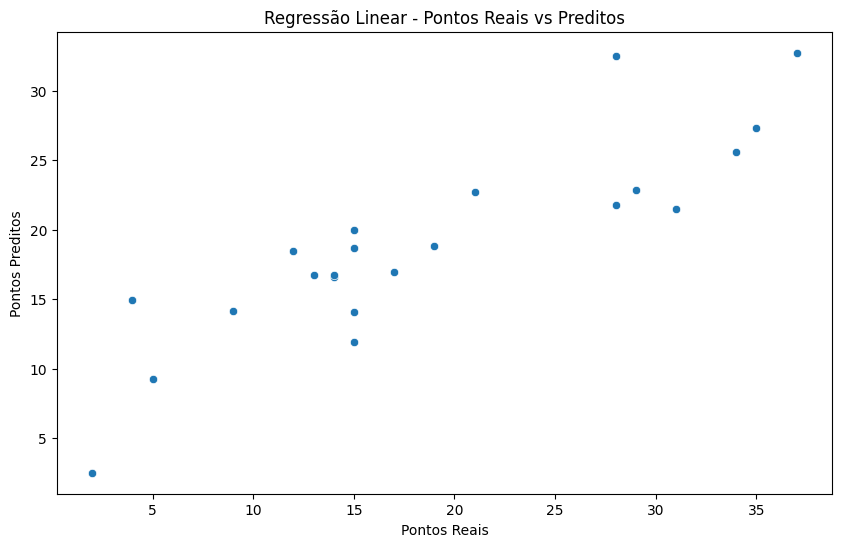

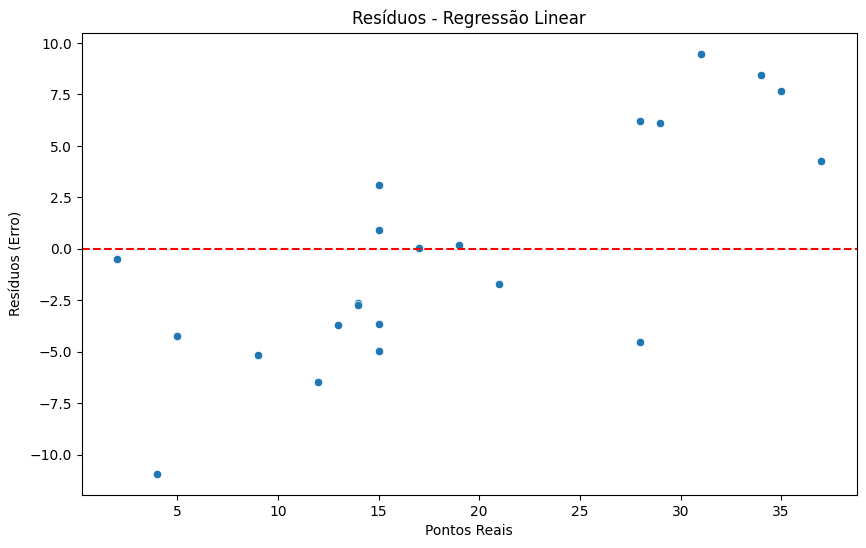

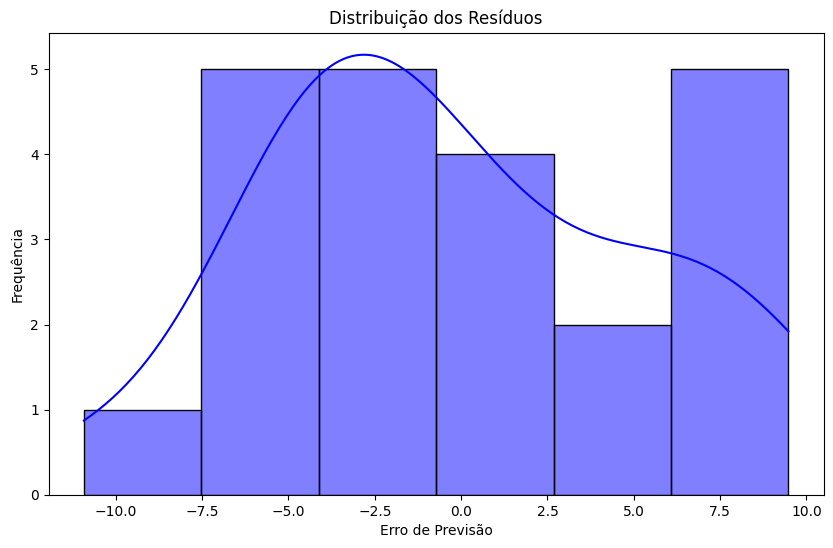

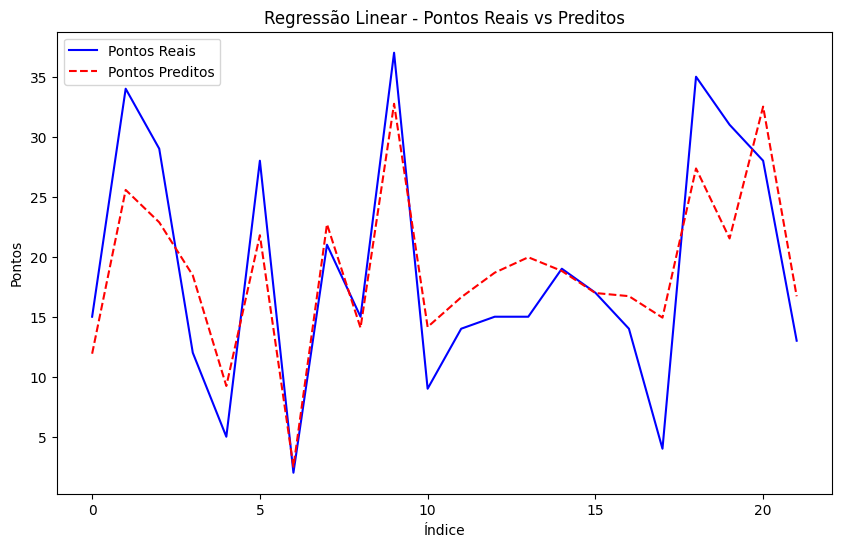

Coeficientes do Modelo de Regressão Linear:
     Coeficiente
MIN     0.106167
FGA     0.919153
TOV     0.589977

Métricas de Avaliação para Regressão Linear:
Erro Quadrático Médio (MSE): 28.13
Raiz do Erro Quadrático Médio (RMSE): 5.30
R² (Coeficiente de Determinação): 0.72


In [8]:
# 🔹 Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir dados de treino e teste para regressão linear
X_train, X_test, y_train_lin, y_test_lin = train_test_split(X, y_lin, test_size=0.2, random_state=42)

# Criar e treinar o modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_lin)

# Fazer previsões
y_pred_lin = lin_reg.predict(X_test)

# 📊 Visualizações - Regressão Linear

# 1. Gráfico de dispersão - Pontos reais vs Preditos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_lin, y=y_pred_lin)
plt.xlabel("Pontos Reais")
plt.ylabel("Pontos Preditos")
plt.title("Regressão Linear - Pontos Reais vs Preditos")
plt.show()

# 2. Resíduo (Erro) - Erro de previsão vs Pontos reais
residuals = y_test_lin - y_pred_lin
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_lin, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Pontos Reais")
plt.ylabel("Resíduos (Erro)")
plt.title("Resíduos - Regressão Linear")
plt.show()

# 3. Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro de Previsão")
plt.ylabel("Frequência")
plt.show()

# 4. Gráfico de linha - Preditos vs Reais
plt.figure(figsize=(10, 6))
plt.plot(y_test_lin.values, label="Pontos Reais", color="blue")
plt.plot(y_pred_lin, label="Pontos Preditos", color="red", linestyle="--")
plt.xlabel("Índice")
plt.ylabel("Pontos")
plt.title("Regressão Linear - Pontos Reais vs Preditos")
plt.legend()
plt.show()

# 5. Coeficientes do Modelo
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=["Coeficiente"])
print("Coeficientes do Modelo de Regressão Linear:")
print(coefficients)

# 6. Métricas de Avaliação
mse = mean_squared_error(y_test_lin, y_pred_lin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lin, y_pred_lin)

print("\nMétricas de Avaliação para Regressão Linear:")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")


# Regressão Logística

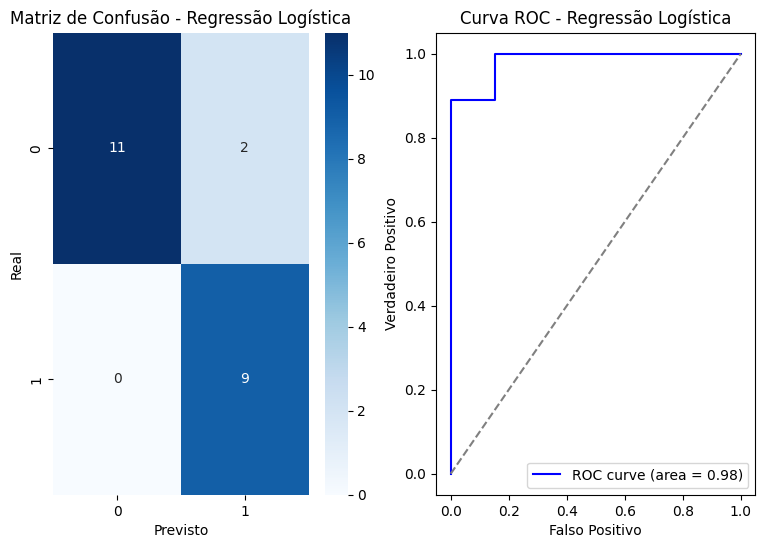

Relatório de Classificação - Regressão Logística:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.82      1.00      0.90         9

    accuracy                           0.91        22
   macro avg       0.91      0.92      0.91        22
weighted avg       0.93      0.91      0.91        22



In [9]:
# 🔹 Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Dividir dados de treino e teste para regressão logística
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Criar e treinar o modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_log)

# Fazer previsões
y_pred_log = log_reg.predict(X_test)

# 🔹 Matriz de Confusão para Regressão Logística
conf_matrix = confusion_matrix(y_test_log, y_pred_log)

# 🔹 Curva ROC para Regressão Logística
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_log, y_prob)
roc_auc = auc(fpr, tpr)

# 📊 Visualizações
plt.figure(figsize=(14, 6))

# Gráfico 1 - Matriz de Confusão
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")

# Gráfico 2 - Curva ROC
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Regressão Logística")
plt.legend()

plt.show()

# 📊 Relatório de Classificação
print("Relatório de Classificação - Regressão Logística:\n", classification_report(y_test_log, y_pred_log))


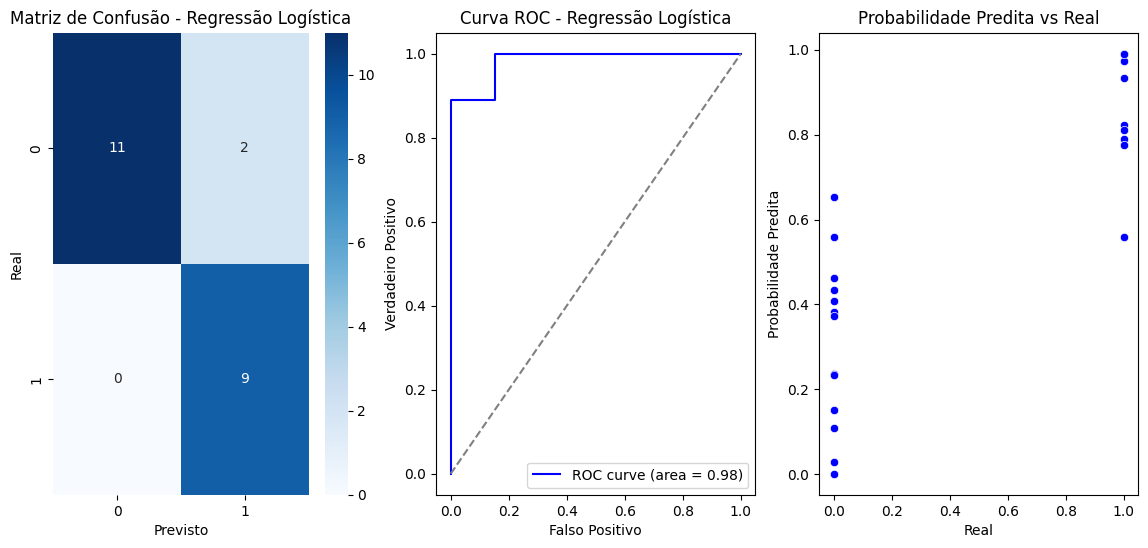

Relatório de Classificação - Regressão Logística:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.82      1.00      0.90         9

    accuracy                           0.91        22
   macro avg       0.91      0.92      0.91        22
weighted avg       0.93      0.91      0.91        22


Métricas de Avaliação - Regressão Logística:
Acurácia: 0.91
Precisão: 0.82
Recall: 1.00
F1-Score: 0.90


In [10]:
# 🔹 Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir dados de treino e teste para regressão logística
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Criar e treinar o modelo
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train_log)

# Fazer previsões
y_pred_log = log_reg.predict(X_test)

# 🔹 Matriz de Confusão para Regressão Logística
conf_matrix = confusion_matrix(y_test_log, y_pred_log)

# 🔹 Curva ROC para Regressão Logística
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_log, y_prob)
roc_auc = auc(fpr, tpr)

# 📊 Visualizações
plt.figure(figsize=(14, 6))

# Gráfico 1 - Matriz de Confusão
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")

# Gráfico 2 - Curva ROC
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Regressão Logística")
plt.legend()

# Gráfico 3 - Probabilidade Predita vs Real
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test_log, y=y_prob, color="blue")
plt.xlabel("Real")
plt.ylabel("Probabilidade Predita")
plt.title("Probabilidade Predita vs Real")

plt.show()

# 📊 Relatório de Classificação
print("Relatório de Classificação - Regressão Logística:\n", classification_report(y_test_log, y_pred_log))

# 🔹 Métricas de Avaliação para Regressão Logística
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)
recall = recall_score(y_test_log, y_pred_log)
f1 = f1_score(y_test_log, y_pred_log)

print("\nMétricas de Avaliação - Regressão Logística:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


In [11]:
print("Distribuição das classes no treino:", np.bincount(y_train_log))
print("Distribuição das classes no teste:", np.bincount(y_test_log))


Distribuição das classes no treino: [43 42]
Distribuição das classes no teste: [13  9]


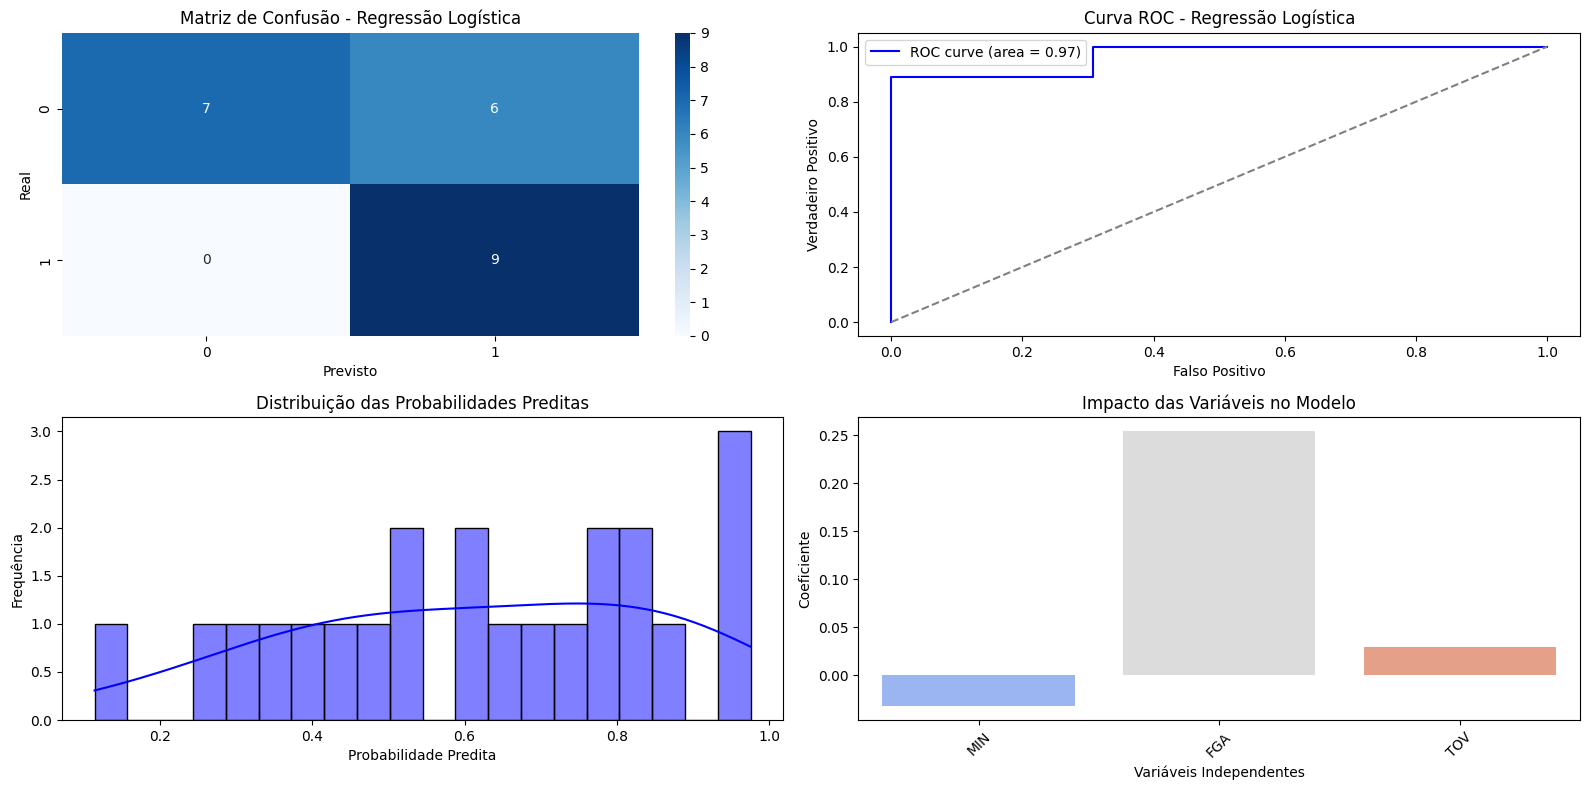

Relatório de Classificação - Regressão Logística:
               precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.60      1.00      0.75         9

    accuracy                           0.73        22
   macro avg       0.80      0.77      0.72        22
weighted avg       0.84      0.73      0.72        22


Métricas de Avaliação - Regressão Logística:
Acurácia: 0.73
Precisão: 0.60
Recall: 1.00
F1-Score: 0.75


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc,
                             accuracy_score, precision_score, recall_score, f1_score)
from sklearn.model_selection import train_test_split

# 🔹 Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 🔹 Criar e treinar o modelo
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear')
log_reg.fit(X_train, y_train)

# 🔹 Fazer previsões
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# 🔹 Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# 🔹 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 🔹 Obter coeficientes do modelo
coefs = pd.DataFrame(log_reg.coef_.flatten(), index=X.columns, columns=['Coeficiente'])

# 📊 Visualizações
plt.figure(figsize=(16, 8))

# Gráfico 1 - Matriz de Confusão
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')

# Gráfico 2 - Curva ROC
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Regressão Logística')
plt.legend()

# Gráfico 3 - Probabilidade Predita vs Real
plt.subplot(2, 2, 3)
sns.histplot(y_prob, kde=True, bins=20, color='blue')
plt.xlabel('Probabilidade Predita')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades Preditas')

# Gráfico 4 - Coeficientes do Modelo
plt.subplot(2, 2, 4)
sns.barplot(x=coefs.index, y=coefs['Coeficiente'], palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Variáveis Independentes')
plt.ylabel('Coeficiente')
plt.title('Impacto das Variáveis no Modelo')

plt.tight_layout()
plt.show()

# 📊 Relatório de Classificação
print("Relatório de Classificação - Regressão Logística:\n", classification_report(y_test, y_pred))

# 🔹 Métricas de Avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas de Avaliação - Regressão Logística:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


In [13]:
import numpy as np

print("Distribuição das classes em y_log:")
print(np.bincount(y_log))


Distribuição das classes em y_log:
[56 51]


In [14]:
print("Tipo da variável y_log:", type(y_log))
print("Valores únicos em y_log:", np.unique(y_log))


Tipo da variável y_log: <class 'pandas.core.series.Series'>
Valores únicos em y_log: [0 1]


In [15]:
y_log = y_log.astype(int)  # Converte para inteiro se necessário


In [16]:
print("Tipo da variável y_log:", type(y_log))
print("Valores únicos em y_log:", np.unique(y_log))


Tipo da variável y_log: <class 'pandas.core.series.Series'>
Valores únicos em y_log: [0 1]


In [17]:
print("Tamanho de X:", X.shape)
print("Tamanho de y_log:", y_log.shape)


Tamanho de X: (107, 3)
Tamanho de y_log: (107,)


Distribuição da variável alvo antes da divisão:
0    56
1    51
Name: PTS, dtype: int64


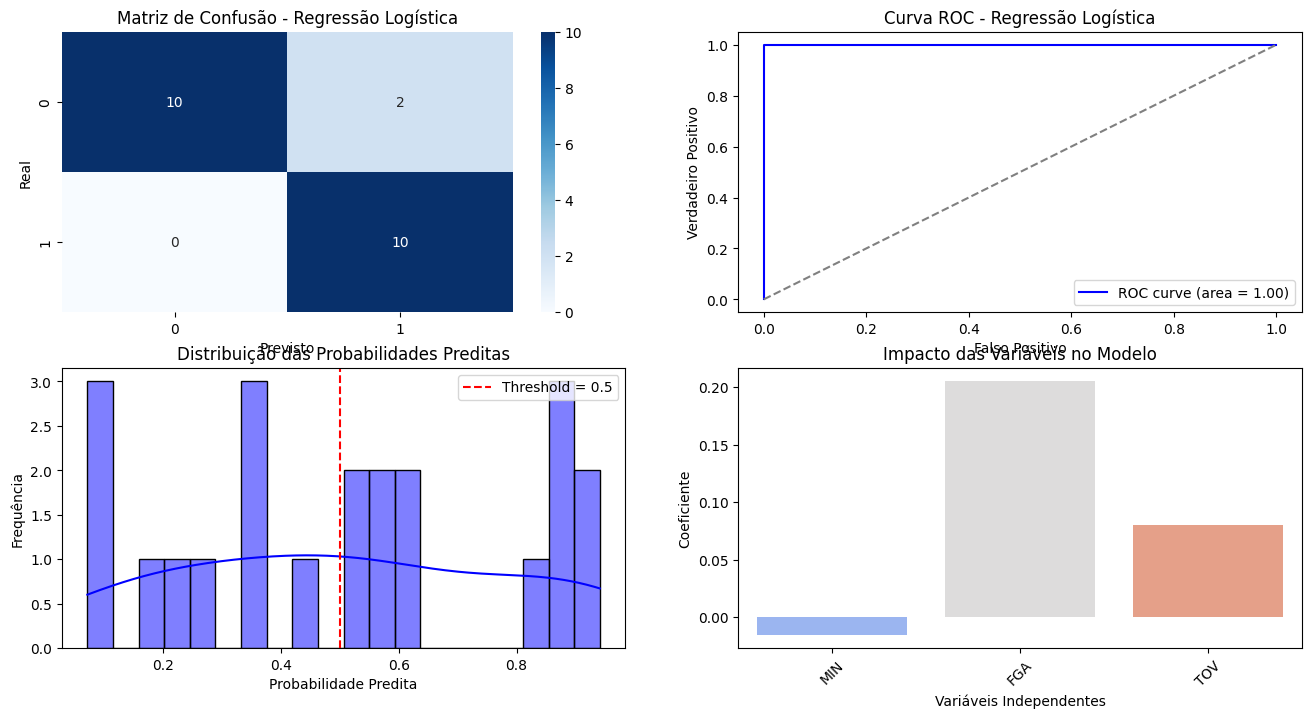

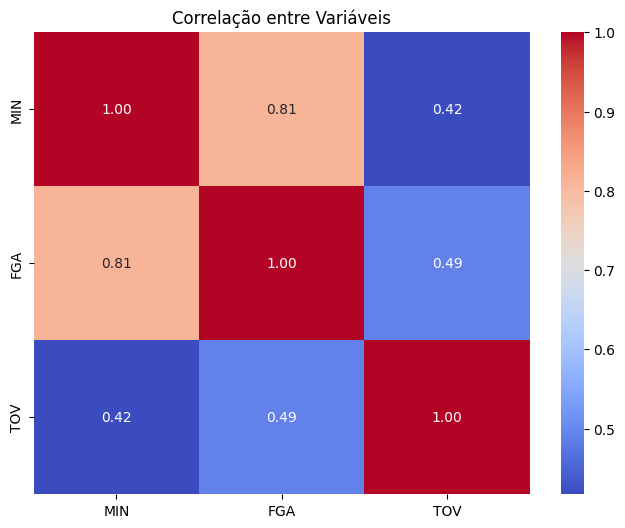

<Figure size 640x480 with 0 Axes>

Relatório de Classificação - Regressão Logística:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.83      1.00      0.91        10

    accuracy                           0.91        22
   macro avg       0.92      0.92      0.91        22
weighted avg       0.92      0.91      0.91        22


Métricas de Avaliação - Regressão Logística:
Acurácia: 0.91
Precisão: 0.83
Recall: 1.00
F1-Score: 0.91


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc,
                             accuracy_score, precision_score, recall_score, f1_score)
from sklearn.model_selection import train_test_split

# 🔹 Verificar balanceamento da variável alvo
print("Distribuição da variável alvo antes da divisão:")
print(y_log.value_counts())

# 🔹 Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42, stratify=y_log)

# 🔹 Reequilibrar os dados se necessário
if y_train.value_counts().min() < 5:  # Verifica se há muito desbalanceamento
    from sklearn.utils import resample
    df_train = pd.concat([X_train, y_train], axis=1)
    df_majority = df_train[df_train[y_train.name] == y_train.value_counts().idxmax()]
    df_minority = df_train[df_train[y_train.name] == y_train.value_counts().idxmin()]

    df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
    df_train_balanced = pd.concat([df_majority, df_minority_upsampled])

    X_train = df_train_balanced.drop(columns=[y_train.name])
    y_train = df_train_balanced[y_train.name]

# 🔹 Criar e treinar o modelo
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear')
log_reg.fit(X_train, y_train)

# 🔹 Fazer previsões
y_prob = log_reg.predict_proba(X_test)[:, 1]

# 🔹 Ajustar o threshold para evitar previsões enviesadas
threshold = 0.5  # Teste valores como 0.55 ou 0.45 se necessário
y_pred = (y_prob > threshold).astype(int)

# 🔹 Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# 🔹 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 🔹 Obter coeficientes do modelo
coefs = pd.DataFrame(log_reg.coef_.flatten(), index=X.columns, columns=['Coeficiente'])

# 📊 Visualizações
plt.figure(figsize=(16, 8))

# Gráfico 1 - Matriz de Confusão
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')

# Gráfico 2 - Curva ROC
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Regressão Logística')
plt.legend()

# Gráfico 3 - Probabilidade Predita vs Real
plt.subplot(2, 2, 3)
sns.histplot(y_prob, kde=True, bins=20, color='blue')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Probabilidade Predita')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades Preditas')
plt.legend()

# Gráfico 4 - Coeficientes do Modelo
plt.subplot(2, 2, 4)
sns.barplot(x=coefs.index, y=coefs['Coeficiente'], palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Variáveis Independentes')
plt.ylabel('Coeficiente')
plt.title('Impacto das Variáveis no Modelo')

# Gráfico extra - Correlação entre as variáveis
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis')
plt.show()

plt.tight_layout()
plt.show()

# 📊 Relatório de Classificação
print("Relatório de Classificação - Regressão Logística:\n", classification_report(y_test, y_pred))

# 🔹 Métricas de Avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas de Avaliação - Regressão Logística:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


In [19]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Distribuição da variável alvo antes da divisão:
0    56
1    51
Name: PTS, dtype: int64


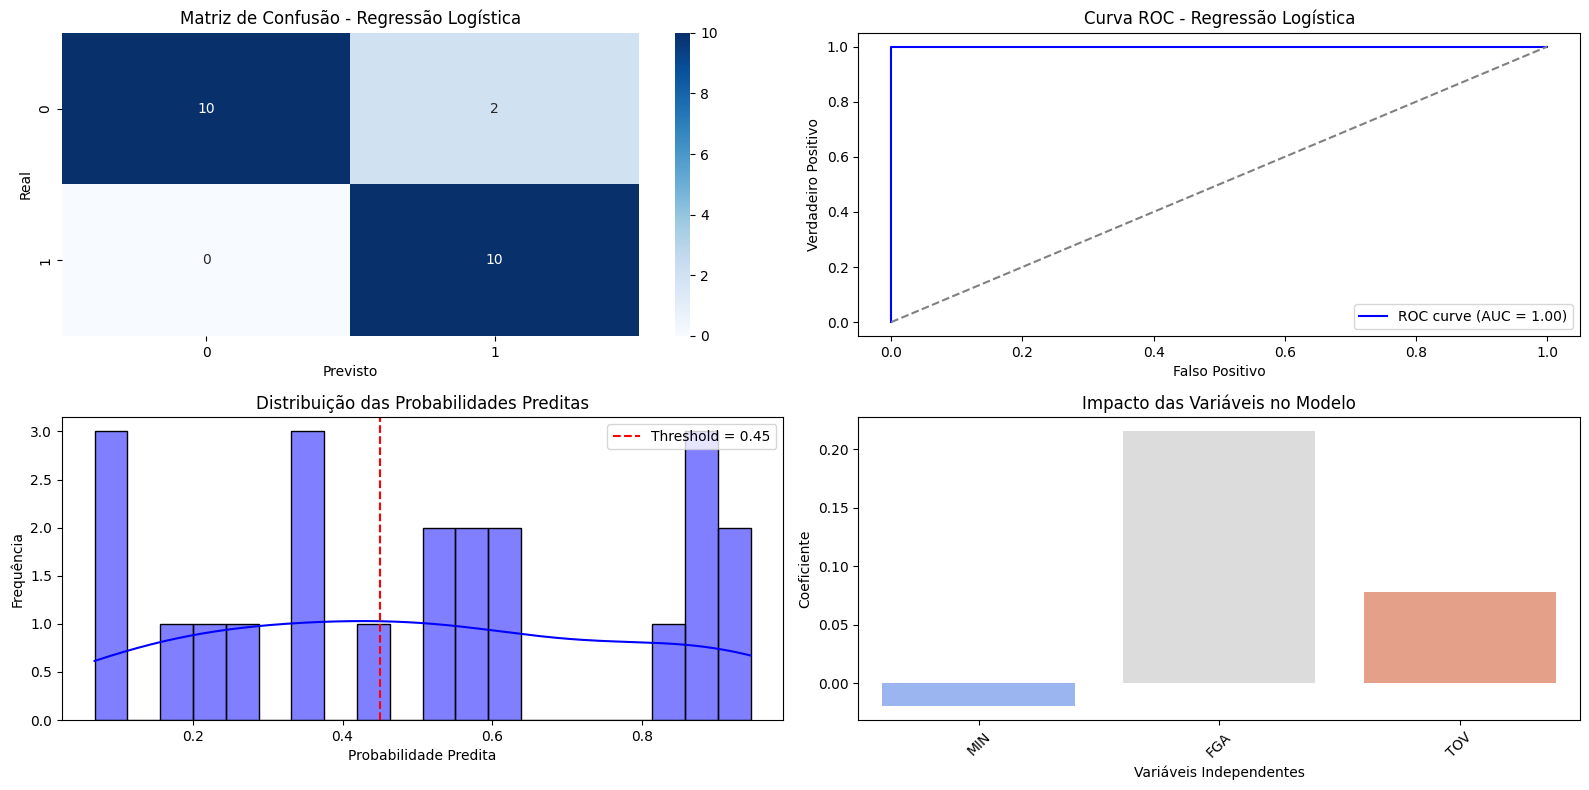

Relatório de Classificação - Regressão Logística:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.83      1.00      0.91        10

    accuracy                           0.91        22
   macro avg       0.92      0.92      0.91        22
weighted avg       0.92      0.91      0.91        22


Métricas de Avaliação - Regressão Logística:
Acurácia: 0.91
Precisão: 0.83
Recall: 1.00
F1-Score: 0.91
Matthews Correlation Coefficient (MCC): 0.83

Validação Cruzada - Acurácia Média: 0.78

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.90      0.95        10

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22


Métricas de Avaliação - Random Forest:
Acurácia: 0.95
Prec

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc,
                             accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef)
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# 🔹 Verificar balanceamento da variável alvo
print("Distribuição da variável alvo antes da divisão:")
print(y_log.value_counts())

# 🔹 Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42, stratify=y_log)

# 🔹 Reequilibrar os dados com SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 🔹 Criar e treinar o modelo de Regressão Logística
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', C=1.0)
log_reg.fit(X_train_res, y_train_res)

# 🔹 Fazer previsões
y_prob = log_reg.predict_proba(X_test)[:, 1]

# 🔹 Ajustar o threshold para evitar previsões enviesadas
threshold = 0.45  # Ajuste do limiar de decisão
y_pred = (y_prob > threshold).astype(int)

# 🔹 Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# 🔹 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 🔹 Coeficientes do modelo
coefs = pd.DataFrame(log_reg.coef_.flatten(), index=X.columns, columns=['Coeficiente'])

# 📊 Visualizações
plt.figure(figsize=(16, 8))

# Gráfico 1 - Matriz de Confusão
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')

# Gráfico 2 - Curva ROC
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Regressão Logística')
plt.legend()

# Gráfico 3 - Probabilidade Predita vs Real
plt.subplot(2, 2, 3)
sns.histplot(y_prob, kde=True, bins=20, color='blue')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Probabilidade Predita')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades Preditas')
plt.legend()

# Gráfico 4 - Coeficientes do Modelo
plt.subplot(2, 2, 4)
sns.barplot(x=coefs.index, y=coefs['Coeficiente'], palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Variáveis Independentes')
plt.ylabel('Coeficiente')
plt.title('Impacto das Variáveis no Modelo')

plt.tight_layout()
plt.show()

# 📊 Relatório de Classificação
print("Relatório de Classificação - Regressão Logística:\n", classification_report(y_test, y_pred))

# 🔹 Métricas de Avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("\nMétricas de Avaliação - Regressão Logística:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# 🔹 Validação Cruzada
cv_scores = cross_val_score(log_reg, X, y_log, cv=5, scoring='accuracy')
print(f"\nValidação Cruzada - Acurácia Média: {cv_scores.mean():.2f}")

# 🔹 Comparação com RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf.fit(X_train_res, y_train_res)
y_pred_rf = rf_clf.predict(X_test)

# 📊 Relatório de Classificação para RandomForest
print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# 🔹 Métricas de Avaliação para RandomForest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

print("\nMétricas de Avaliação - Random Forest:")
print(f"Acurácia: {accuracy_rf:.2f}")
print(f"Precisão: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_rf:.2f}")


In [21]:
import streamlit as st
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import playergamelog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir jogadores do Charlotte Hornets
players = {
    "LaMelo Ball": 1630163,
    "Brandon Miller": 1641706,
    "Moussa Diabate": 1631217
}

# Função para coletar os dados da NBA API
def get_player_stats(player_id, season):
    try:
        log = playergamelog.PlayerGameLog(player_id=player_id, season=season)
        games = log.get_data_frames()[0]
        return games[['GAME_DATE', 'PTS', 'REB', 'AST', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA']]
    except Exception as e:
        st.error(f"Erro ao buscar dados do jogador {player_id} para a temporada {season}: {e}")
        return pd.DataFrame()

# Coletar dados das temporadas 2023-24 e 2024-25
seasons = ["2023-24", "2024-25"]
data = {player: pd.concat([get_player_stats(pid, season) for season in seasons], ignore_index=True) for player, pid in players.items()}

# Criar modelos de regressão para cada estatística (Pontos, Rebotes, Assistências)
models = {}
predictions = {}

for player, df in data.items():
    if df.empty:
        continue

    df = df.drop(columns=['GAME_DATE'])  # Remover a data do jogo
    df = df.dropna()  # Remover valores nulos

    X = df.drop(columns=['PTS', 'REB', 'AST'])  # Features
    y_pts, y_reb, y_ast = df['PTS'], df['REB'], df['AST']  # Targets

    # Separação treino/teste (80% treino, 20% teste)
    X_train, X_test, y_train_pts, y_test_pts = train_test_split(X, y_pts, test_size=0.2, random_state=42)
    X_train, X_test, y_train_reb, y_test_reb = train_test_split(X, y_reb, test_size=0.2, random_state=42)
    X_train, X_test, y_train_ast, y_test_ast = train_test_split(X, y_ast, test_size=0.2, random_state=42)

    # Criar modelo de regressão linear
    model_pts = LinearRegression().fit(X_train, y_train_pts)
    model_reb = LinearRegression().fit(X_train, y_train_reb)
    model_ast = LinearRegression().fit(X_train, y_train_ast)

    # Testar modelo
    y_pred_pts = model_pts.predict(X_test)
    y_pred_reb = model_reb.predict(X_test)
    y_pred_ast = model_ast.predict(X_test)

    # Calcular métricas
    metrics_pts = {
        "MAE": mean_absolute_error(y_test_pts, y_pred_pts),
        "MSE": mean_squared_error(y_test_pts, y_pred_pts),
        "R²": r2_score(y_test_pts, y_pred_pts)
    }

    metrics_reb = {
        "MAE": mean_absolute_error(y_test_reb, y_pred_reb),
        "MSE": mean_squared_error(y_test_reb, y_pred_reb),
        "R²": r2_score(y_test_reb, y_pred_reb)
    }

    metrics_ast = {
        "MAE": mean_absolute_error(y_test_ast, y_pred_ast),
        "MSE": mean_squared_error(y_test_ast, y_pred_ast),
        "R²": r2_score(y_test_ast, y_pred_ast)
    }

    # Armazenar modelos e previsões
    models[player] = {"PTS": model_pts, "REB": model_reb, "AST": model_ast}
    predictions[player] = {
        "PTS": {"y_true": y_test_pts, "y_pred": y_pred_pts, "metrics": metrics_pts},
        "REB": {"y_true": y_test_reb, "y_pred": y_pred_reb, "metrics": metrics_reb},
        "AST": {"y_true": y_test_ast, "y_pred": y_pred_ast, "metrics": metrics_ast}
    }

# Exibir resultados no Streamlit
st.title("🏀 Previsão de Estatísticas dos Jogadores do Charlotte Hornets")
st.write("Usando **Regressão Linear** para prever pontos, rebotes e assistências.")

# Selecionar jogador
player_name = st.selectbox("Selecione um jogador:", list(players.keys()))
if player_name in predictions:
    st.subheader(f"📊 Estatísticas previstas para {player_name}")

    for stat in ["PTS", "REB", "AST"]:
        st.write(f"### {stat} - Estatísticas do Modelo")
        metrics = predictions[player_name][stat]["metrics"]
        st.write(f"**MAE**: {metrics['MAE']:.2f}")
        st.write(f"**MSE**: {metrics['MSE']:.2f}")
        st.write(f"**R²**: {metrics['R²']:.2f}")

        # Exibir distribuição dos valores reais e previstos
        y_true = predictions[player_name][stat]["y_true"]
        y_pred = predictions[player_name][stat]["y_pred"]

        # Calcular estatísticas
        mean_val = np.mean(y_true)
        median_val = np.median(y_true)
        mode_val = y_true.mode()[0]
        min_val = np.min(y_true)
        max_val = np.max(y_true)

        # Probabilidades de ficar acima ou abaixo das estatísticas-chave
        prob_above_mean = np.mean(y_pred > mean_val)
        prob_below_mean = 1 - prob_above_mean
        prob_above_median = np.mean(y_pred > median_val)
        prob_below_median = 1 - prob_above_median
        prob_above_mode = np.mean(y_pred > mode_val)
        prob_below_mode = 1 - prob_above_mode

        st.write(f"**Probabilidade de marcar acima da média**: {prob_above_mean:.2f}")
        st.write(f"**Probabilidade de marcar abaixo da média**: {prob_below_mean:.2f}")
        st.write(f"**Probabilidade de marcar acima da mediana**: {prob_above_median:.2f}")
        st.write(f"**Probabilidade de marcar abaixo da mediana**: {prob_below_median:.2f}")
        st.write(f"**Probabilidade de marcar acima da moda**: {prob_above_mode:.2f}")
        st.write(f"**Probabilidade de marcar abaixo da moda**: {prob_below_mode:.2f}")

        # Gráfico de dispersão real vs previsto
        st.subheader(f"Gráfico Real vs Previsto - {stat}")
        df_plot = pd.DataFrame({"Real": y_true, "Previsto": y_pred})
        st.line_chart(df_plot)
else:
    st.warning("Dados insuficientes para exibir previsões.")


2025-02-10 23:38:04.801 
  command:

    streamlit run C:\Users\genar\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
